# EDA Bike Project

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

start by uploading the files, then merge them into one data frame:

In [2]:
df1 = pd.read_csv(r'september_2020_trip_data.csv')
df2 = pd.read_csv(r'october_2020_trip_data.csv')
df3 = pd.read_csv(r'november_2020_trip_data.csv')
df4 = pd.read_csv(r'december_2020_trip_data.csv')
df5 = pd.read_csv(r'january_2021_trip_data.csv')
df6 = pd.read_csv(r'febuary_2021_trip_data.csv')
df7 = pd.read_csv(r'march_2021_trip_data.csv')
df8 = pd.read_csv(r'april_2021_trip_data.csv')
df9 = pd.read_csv(r'may_2021_trip_data.csv')
df10 = pd.read_csv(r'june_2021_trip_data.csv')
df11 = pd.read_csv(r'july_2021_trip_data.csv')
df12 = pd.read_csv(r'august_2021_trip_data.csv')

In [3]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], ignore_index=True)

Quick look to the dataset:

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,2B22BD5F95FB2629,electric_bike,17/09/2020 14:27,17/09/2020 14:44,Michigan Ave & Lake St,52.0,Green St & Randolph St,112.0,41.886692,-87.623561,41.883570,-87.648731,casual
1,A7FB70B4AFC6CAF2,electric_bike,17/09/2020 15:07,17/09/2020 15:07,W Oakdale Ave & N Broadway,NaN,W Oakdale Ave & N Broadway,NaN,41.940000,-87.640000,41.940000,-87.640000,casual
2,86057FA01BAC778E,electric_bike,17/09/2020 15:09,17/09/2020 15:09,W Oakdale Ave & N Broadway,NaN,W Oakdale Ave & N Broadway,NaN,41.940000,-87.640000,41.940000,-87.640000,casual
3,57F6DC9A153DB98C,electric_bike,17/09/2020 18:10,17/09/2020 18:35,Ashland Ave & Belle Plaine Ave,246.0,Montrose Harbor,249.0,41.956060,-87.668916,41.963985,-87.638216,casual
4,B9C4712F78C1AE68,electric_bike,17/09/2020 15:16,17/09/2020 15:52,Fairbanks Ct & Grand Ave,24.0,Fairbanks Ct & Grand Ave,24.0,41.891860,-87.621008,41.891346,-87.620325,casual


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913072 entries, 0 to 4913071
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 487.3+ MB


In [6]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    450045
start_station_id      450571
end_station_name      491380
end_station_id        491764
start_lat                  0
start_lng                  0
end_lat                 5015
end_lng                 5015
member_casual              0
dtype: int64

convert sarted_at and ended_at to datetime data type:

In [7]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

/var/folders/k8/y0z2plnn5txb3ts2cb5njn7m0000gn/T/ipykernel_38345/2546978526.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['started_at'] = pd.to_datetime(df['started_at'])
/var/folders/k8/y0z2plnn5txb3ts2cb5njn7m0000gn/T/ipykernel_38345/2546978526.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ended_at'] = pd.to_datetime(df['ended_at'])


separate date and time:

In [8]:
df['started_date'] = df['started_at'].dt.date
df['started_time'] = df['started_at'].dt.time

df['ended_date'] = df['ended_at'].dt.date
df['ended_time'] = df['ended_at'].dt.time


drop unwanted columns:

In [9]:
df.drop(columns=['started_at' ,'ended_at','start_station_id', 'end_station_id'], inplace=True)

In [10]:
df.head()

,ride_id,rideable_type,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,started_date,started_time,ended_date,ended_time
0,2B22BD5F95FB2629,electric_bike,Michigan Ave & Lake St,Green St & Randolph St,41.886692,-87.623561,41.883570,-87.648731,casual,2020-09-17,14:27:00,2020-09-17,14:44:00
1,A7FB70B4AFC6CAF2,electric_bike,W Oakdale Ave & N Broadway,W Oakdale Ave & N Broadway,41.940000,-87.640000,41.940000,-87.640000,casual,2020-09-17,15:07:00,2020-09-17,15:07:00
2,86057FA01BAC778E,electric_bike,W Oakdale Ave & N Broadway,W Oakdale Ave & N Broadway,41.940000,-87.640000,41.940000,-87.640000,casual,2020-09-17,15:09:00,2020-09-17,15:09:00
3,57F6DC9A153DB98C,electric_bike,Ashland Ave & Belle Plaine Ave,Montrose Harbor,41.956060,-87.668916,41.963985,-87.638216,casual,2020-09-17,18:10:00,2020-09-17,18:35:00
4,B9C4712F78C1AE68,electric_bike,Fairbanks Ct & Grand Ave,Fairbanks Ct & Grand Ave,41.891860,-87.621008,41.891346,-87.620325,casual,2020-09-17,15:16:00,2020-09-17,15:52:00


after separating , i did convert them into datetime and timedelta data type:

In [11]:
df['started_date'] = pd.to_datetime(df['started_date'],errors='coerce')
df['ended_date'] = pd.to_datetime(df['ended_date'],errors='coerce')

df['started_time'] = pd.to_timedelta(df['started_time'].astype(str))
df['ended_time']   = pd.to_timedelta(df['ended_time'].astype(str))


creating new column 'trip_duration' to help me finding asnwers:

In [12]:
df['trip_duration'] = df['ended_time'] - df['started_time']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913072 entries, 0 to 4913071
Data columns (total 14 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   start_station_name  object         
 3   end_station_name    object         
 4   start_lat           float64        
 5   start_lng           float64        
 6   end_lat             float64        
 7   end_lng             float64        
 8   member_casual       object         
 9   started_date        datetime64[ns] 
 10  started_time        timedelta64[ns]
 11  ended_date          datetime64[ns] 
 12  ended_time          timedelta64[ns]
 13  trip_duration       timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(5), timedelta64[ns](3)
memory usage: 524.8+ MB


In [14]:
df.head()

,ride_id,rideable_type,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,started_date,started_time,ended_date,ended_time,trip_duration
0,2B22BD5F95FB2629,electric_bike,Michigan Ave & Lake St,Green St & Randolph St,41.886692,-87.623561,41.883570,-87.648731,casual,2020-09-17,0 days 14:27:00,2020-09-17,0 days 14:44:00,0 days 00:17:00
1,A7FB70B4AFC6CAF2,electric_bike,W Oakdale Ave & N Broadway,W Oakdale Ave & N Broadway,41.940000,-87.640000,41.940000,-87.640000,casual,2020-09-17,0 days 15:07:00,2020-09-17,0 days 15:07:00,0 days 00:00:00
2,86057FA01BAC778E,electric_bike,W Oakdale Ave & N Broadway,W Oakdale Ave & N Broadway,41.940000,-87.640000,41.940000,-87.640000,casual,2020-09-17,0 days 15:09:00,2020-09-17,0 days 15:09:00,0 days 00:00:00
3,57F6DC9A153DB98C,electric_bike,Ashland Ave & Belle Plaine Ave,Montrose Harbor,41.956060,-87.668916,41.963985,-87.638216,casual,2020-09-17,0 days 18:10:00,2020-09-17,0 days 18:35:00,0 days 00:25:00
4,B9C4712F78C1AE68,electric_bike,Fairbanks Ct & Grand Ave,Fairbanks Ct & Grand Ave,41.891860,-87.621008,41.891346,-87.620325,casual,2020-09-17,0 days 15:16:00,2020-09-17,0 days 15:52:00,0 days 00:36:00


remove any trip with no information:

In [15]:
df = df[df['trip_duration'] != '0 days 00:00:00']

In [16]:
df.columns

Index(['ride_id', 'rideable_type', 'start_station_name', 'end_station_name',
       'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual',
       'started_date', 'started_time', 'ended_date', 'ended_time',
       'trip_duration'],
      dtype='object')

remove unwanted columns:

In [17]:
df = df[['ride_id', 'rideable_type', 'start_station_name', 'end_station_name', 'member_casual',
       'started_date', 'started_time', 'ended_time',
       'trip_duration']]

In [18]:
df.head()

,ride_id,rideable_type,start_station_name,end_station_name,member_casual,started_date,started_time,ended_time,trip_duration
0,2B22BD5F95FB2629,electric_bike,Michigan Ave & Lake St,Green St & Randolph St,casual,2020-09-17,0 days 14:27:00,0 days 14:44:00,0 days 00:17:00
3,57F6DC9A153DB98C,electric_bike,Ashland Ave & Belle Plaine Ave,Montrose Harbor,casual,2020-09-17,0 days 18:10:00,0 days 18:35:00,0 days 00:25:00
4,B9C4712F78C1AE68,electric_bike,Fairbanks Ct & Grand Ave,Fairbanks Ct & Grand Ave,casual,2020-09-17,0 days 15:16:00,0 days 15:52:00,0 days 00:36:00
5,378BBCE1E444EB80,electric_bike,Clark St & Armitage Ave,NaN,casual,2020-09-17,0 days 18:37:00,0 days 19:23:00,0 days 00:46:00
6,0CB5E2496B6F1DF8,electric_bike,Wells St & Evergreen Ave,Broadway & Sheridan Rd,casual,2020-09-16,0 days 21:39:00,0 days 21:53:00,0 days 00:14:00


In [19]:
df.describe()

,started_date,started_time,ended_time,trip_duration
count,4863680,4863680,4863680,4863680
mean,2021-04-10 19:52:38.118296576,0 days 14:48:08.763956510,0 days 14:58:33.848123231,0 days 00:10:25.084166721
min,2020-09-01 00:00:00,0 days 00:00:00,0 days 00:00:00,-1 days +00:01:00
25%,2020-12-10 00:00:00,0 days 11:44:00,0 days 11:57:00,0 days 00:07:00
50%,2021-05-26 00:00:00,0 days 15:34:00,0 days 15:51:00,0 days 00:13:00
75%,2021-07-17 00:00:00,0 days 18:20:00,0 days 18:35:00,0 days 00:23:00
max,2021-08-31 00:00:00,0 days 23:59:00,0 days 23:59:00,0 days 22:42:00
std,NaN,0 days 04:55:49.578277391,0 days 05:02:03.449394241,0 days 01:57:39.899851822


remove any trip duration = 0 or less:

In [20]:
df = df[df['trip_duration'] >= pd.Timedelta (0)]

In [21]:
df.nunique()

ride_id               4825299
rideable_type               3
start_station_name        757
end_station_name          756
member_casual               2
started_date              365
started_time             1439
ended_time               1439
trip_duration             981
dtype: int64

remove outliers:

In [22]:
Q1 = df['trip_duration'].quantile(0.01)
Q3 = df['trip_duration'].quantile(0.99)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df1 = df[(df['trip_duration'] >= lower_bound) & (df['trip_duration'] <= upper_bound)]

In [23]:
df = df1 

In [24]:
df.describe()

,started_date,started_time,ended_time,trip_duration
count,4821542,4821542,4821542,4821542
mean,2021-04-10 17:44:03.999449344,0 days 14:44:48.243064148,0 days 15:04:29.981458213,0 days 00:19:41.738394065
min,2020-09-01 00:00:00,0 days 00:00:00,0 days 00:01:00,0 days 00:01:00
25%,2020-12-10 00:00:00,0 days 11:42:00,0 days 12:02:00,0 days 00:07:00
50%,2021-05-26 00:00:00,0 days 15:32:00,0 days 15:54:00,0 days 00:13:00
75%,2021-07-17 00:00:00,0 days 18:17:00,0 days 18:36:00,0 days 00:23:00
max,2021-08-31 00:00:00,0 days 23:58:00,0 days 23:59:00,0 days 05:13:00
std,NaN,0 days 04:53:29.803032886,0 days 04:54:32.163590654,0 days 00:23:04.026989700


In [25]:
df.head()

,ride_id,rideable_type,start_station_name,end_station_name,member_casual,started_date,started_time,ended_time,trip_duration
0,2B22BD5F95FB2629,electric_bike,Michigan Ave & Lake St,Green St & Randolph St,casual,2020-09-17,0 days 14:27:00,0 days 14:44:00,0 days 00:17:00
3,57F6DC9A153DB98C,electric_bike,Ashland Ave & Belle Plaine Ave,Montrose Harbor,casual,2020-09-17,0 days 18:10:00,0 days 18:35:00,0 days 00:25:00
4,B9C4712F78C1AE68,electric_bike,Fairbanks Ct & Grand Ave,Fairbanks Ct & Grand Ave,casual,2020-09-17,0 days 15:16:00,0 days 15:52:00,0 days 00:36:00
5,378BBCE1E444EB80,electric_bike,Clark St & Armitage Ave,NaN,casual,2020-09-17,0 days 18:37:00,0 days 19:23:00,0 days 00:46:00
6,0CB5E2496B6F1DF8,electric_bike,Wells St & Evergreen Ave,Broadway & Sheridan Rd,casual,2020-09-16,0 days 21:39:00,0 days 21:53:00,0 days 00:14:00


creating two column: month and weekday:

In [26]:
df['month_year'] = df['started_date'].dt.strftime('%Y-%m')

In [27]:
df['day_of_week'] = df['started_date'].dt.weekday

# Starting the analysis:

# The proportion of casual riders and annual membership

In [28]:
count_member_type = df.groupby('member_casual')['ride_id'].count()
count_member_type

member_casual
casual    2173649
member    2647893
Name: ride_id, dtype: int64

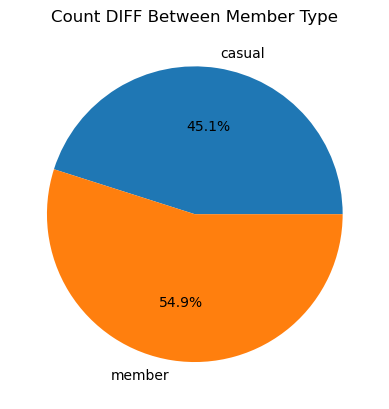

In [29]:
count_member_type.plot(kind='pie', autopct='%1.1f%%')

plt.title('Count DIFF Between Member Type')
plt.ylabel("")

plt.show()

# How long do ‘casual’ and ‘member’ riders spend on the trip (Average)?

In [30]:
avg_trip_user = df.groupby('member_casual').agg({
    'ride_id' : 'count',
    'trip_duration' : 'mean'
}).sort_values(by='ride_id', ascending=False)

avg_trip_user

,ride_id,trip_duration
member_casual,,
member,2647893,0 days 00:13:54.162974108
casual,2173649,0 days 00:26:45.147381200


In [31]:
ride_type_members = df.groupby(['rideable_type','member_casual']).agg({
    'trip_duration' : 'mean'
}).sort_values(by='trip_duration', ascending=False)
ride_type_members

,,trip_duration
rideable_type,member_casual,
docked_bike,casual,0 days 00:37:00.654372329
classic_bike,casual,0 days 00:25:22.576942818
electric_bike,casual,0 days 00:21:06.193089780
docked_bike,member,0 days 00:14:28.037121557
classic_bike,member,0 days 00:13:56.968949672
electric_bike,member,0 days 00:13:28.840960017


In [32]:
df.groupby(['day_of_week','member_casual']).agg({
    'ride_id' : 'count',
    'trip_duration' : 'mean'
}).sort_values(by='day_of_week')

ride_id             trip_duration
day_of_week member_casual                                   
0           casual          245500 0 days 00:27:01.898981670
            member          360093 0 days 00:13:23.347968441
1           casual          237387 0 days 00:24:24.723426303
            member          395451 0 days 00:13:13.844344811
2           casual          237054 0 days 00:23:43.309625654
            member          401638 0 days 00:13:15.199508014
3           casual          242289 0 days 00:23:05.560714683
            member          385341 0 days 00:13:06.845625043
4           casual          312812 0 days 00:24:36.865593391
            member          389891 0 days 00:13:32.917353824
5           casual          486014 0 days 00:29:01.907846276
            member          383043 0 days 00:15:21.918531339
6           casual          412593 0 days 00:30:45.557874224
            member          332436 0 days 00:15:41.227664873

members used the bikes in the weekdays thats explain they're using it as a transportation for thier work, while the casual using more at the weekend!

# In each month, how many casual and member riders through the year?

In [33]:
rides_by_member_monthly = df.groupby(['month_year','member_casual']).agg({
    'ride_id' : 'count'
}).sort_values(by='month_year')

rides_by_member_monthly

ride_id
month_year member_casual         
2020-09    casual          224444
           member          296562
2020-10    casual          141326
           member          238887
2020-11    casual           86475
           member          169133
2020-12    casual           29614
           member          100279
2021-01    casual           17808
           member           77880
2021-02    member           38828
           casual            9884
2021-03    casual           82581
           member          142887
2021-04    casual          133658
           member          197963
2021-05    casual          250599
           member          270664
2021-06    casual          360551
           member          353688
2021-07    casual          432081
           member          374738
2021-08    casual          404628
           member          386384

In [34]:
y1 = df[df['member_casual'] == 'member']['month_year'].value_counts().sort_index()
y2 = df[df['member_casual'] == 'casual']['month_year'].value_counts().sort_index()

x = y1.index

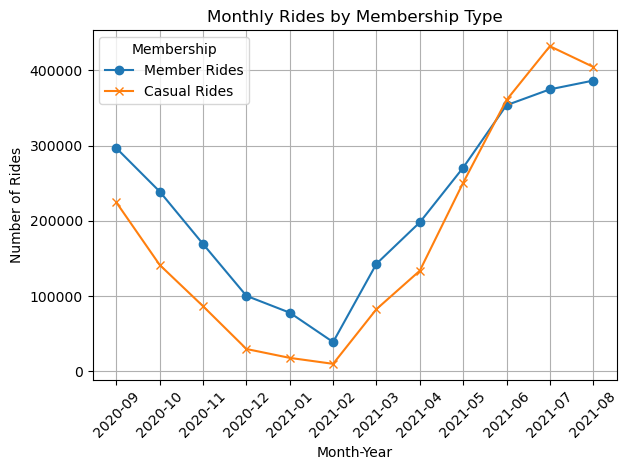

In [35]:
plt.plot(x, y1.values, label='Member Rides', marker='o')
plt.plot(x, y2.values, label='Casual Rides', marker='x')
plt.title('Monthly Rides by Membership Type')
plt.xlabel('Month-Year')
plt.ylabel('Number of Rides')
plt.legend(title='Membership')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

both lines droped in the winter months, then casual rides spikes more than members, thats explain a holiday that people come from diff locations in a short of time so they didn't need to become a members. 

they could do more offers in the last month before the spike like have a free month, so they can expand their suscripstions. in the spike months they should do more ads to improve brand awarness. 

# What are the types of bikes that ‘casual’ and ‘member’ riders ride?

In [36]:
ride_type_by_member = df.groupby(['rideable_type','member_casual']).agg({
    'rideable_type' : 'count'
}).unstack()

ride_type_by_member

rideable_type         
member_casual        casual   member
rideable_type                       
classic_bike         907882  1346266
docked_bike          528048   492975
electric_bike        737719   808652

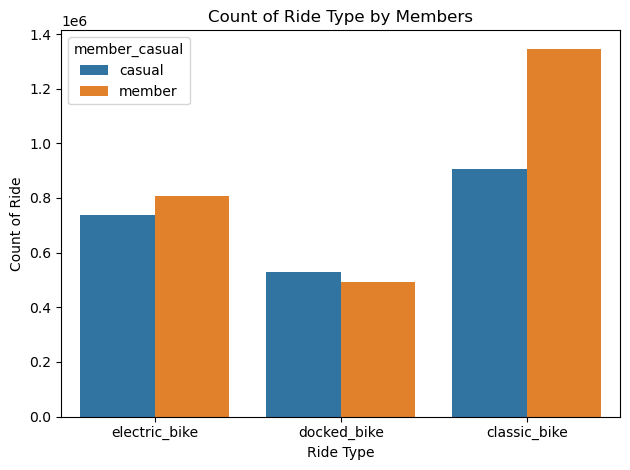

In [37]:
sns.countplot(data=df, x="rideable_type", hue="member_casual")
plt.title('Count of Ride Type by Members')
plt.xlabel('Ride Type')
plt.ylabel('Count of Ride')
plt.tight_layout()

plt.show()

# Which stations are the top start stations for ‘casual’ and ‘member’ riders?

# Which stations are the top destinations for ‘casual’ and ‘member’ riders?

In [38]:
start_member = df[df['member_casual'] == 'member']['start_station_name'].value_counts().head(10)
start_casual = df[df['member_casual'] == 'casual']['start_station_name'].value_counts().head(10)

print(start_member, start_casual)

start_station_name
Clark St & Elm St           23648
Wells St & Concord Ln       21000
Kingsbury St & Kinzie St    20278
Wells St & Elm St           19099
Dearborn St & Erie St       18263
Wells St & Huron St         17662
Broadway & Barry Ave        17623
St. Clair St & Erie St      17593
Theater on the Lake         16511
Clark St & Armitage Ave     16216
Name: count, dtype: int64 start_station_name
Streeter Dr & Grand Ave       55846
Millennium Park               30453
Michigan Ave & Oak St         27348
Lake Shore Dr & Monroe St     26573
Theater on the Lake           21690
Shedd Aquarium                20833
Lake Shore Dr & North Blvd    18425
Wells St & Concord Ln         17056
Indiana Ave & Roosevelt Rd    16389
Clark St & Lincoln Ave        15477
Name: count, dtype: int64


In [39]:
end_member = df[df['member_casual'] == 'member']['end_station_name'].value_counts().head(10)
end_casual = df[df['member_casual'] == 'casual']['end_station_name'].value_counts().head(10)

print(end_member, end_casual)

end_station_name
Clark St & Elm St           24079
Wells St & Concord Ln       21610
Kingsbury St & Kinzie St    20563
Wells St & Elm St           19334
Dearborn St & Erie St       18846
St. Clair St & Erie St      18127
Broadway & Barry Ave        18033
Wells St & Huron St         16942
Theater on the Lake         15449
Clark St & Armitage Ave     15398
Name: count, dtype: int64 end_station_name
Streeter Dr & Grand Ave       58210
Millennium Park               31749
Michigan Ave & Oak St         28510
Lake Shore Dr & Monroe St     25248
Theater on the Lake           23460
Lake Shore Dr & North Blvd    21583
Shedd Aquarium                18533
Wells St & Concord Ln         16960
Indiana Ave & Roosevelt Rd    16211
Clark St & Lincoln Ave        15874
Name: count, dtype: int64


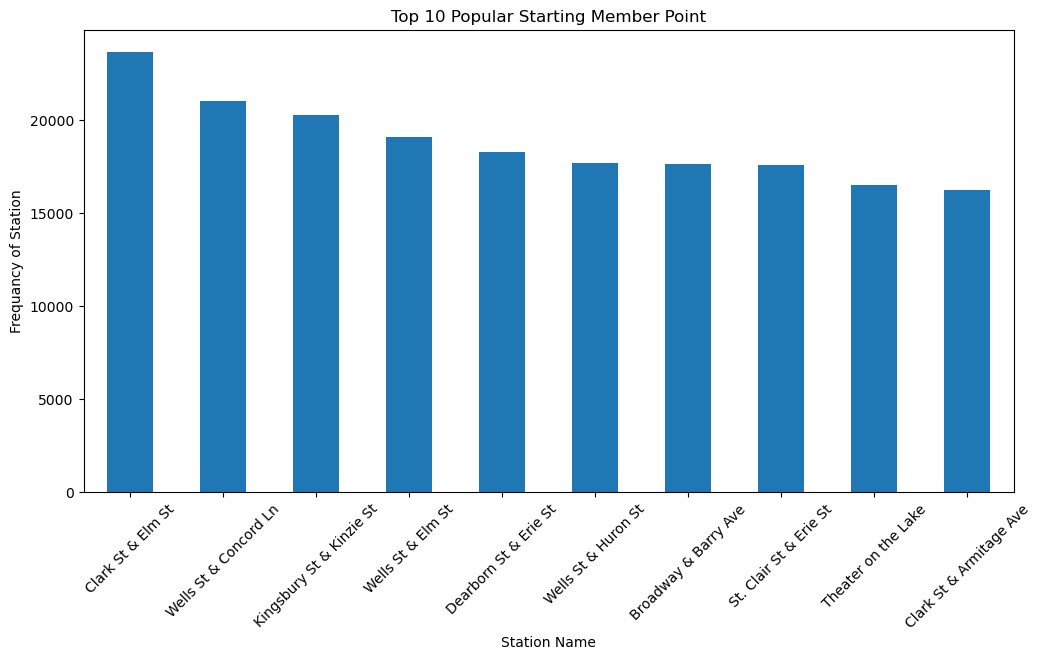

In [40]:
start_member.plot(kind='bar', figsize=(12,6))

plt.title('Top 10 Popular Starting Member Point')
plt.xlabel('Station Name')
plt.ylabel('Frequancy of Station')
plt.xticks(rotation=45)

plt.show()

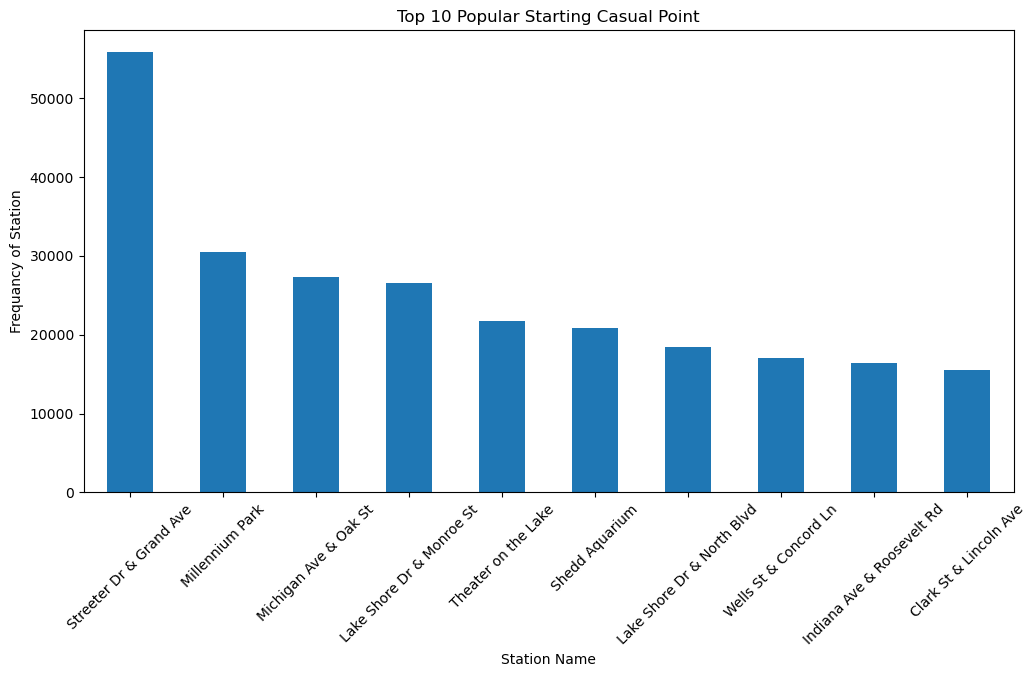

In [41]:
start_casual.plot(kind='bar', figsize=(12,6))

plt.title('Top 10 Popular Starting Casual Point')
plt.xlabel('Station Name')
plt.ylabel('Frequancy of Station')
plt.xticks(rotation=45)

plt.show()

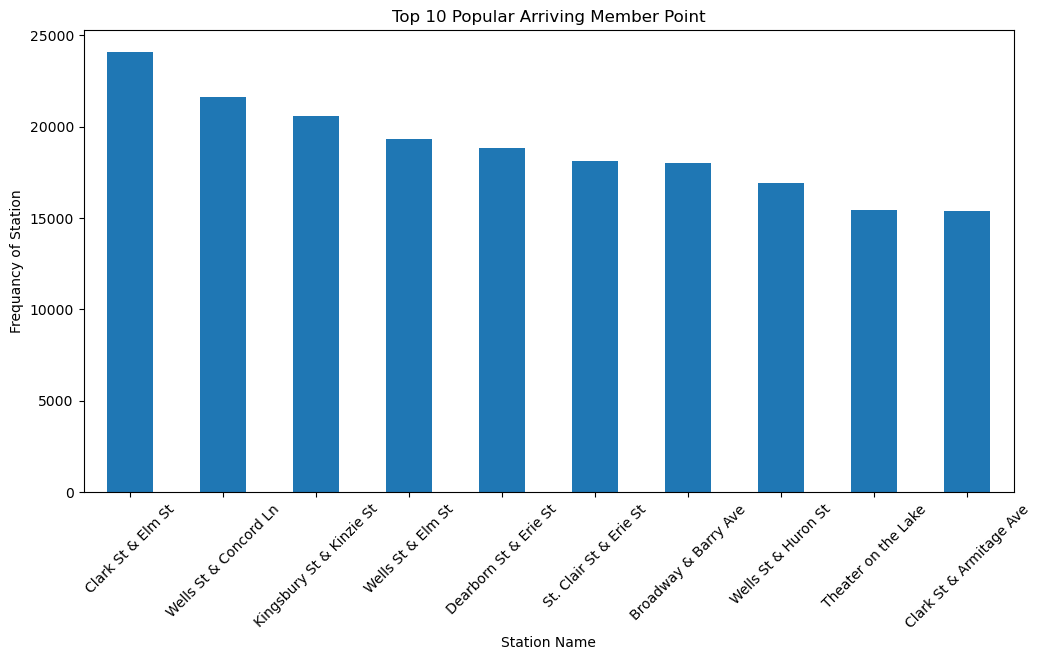

In [42]:
end_member.plot(kind='bar', figsize=(12,6))

plt.title('Top 10 Popular Arriving Member Point')
plt.xlabel('Station Name')
plt.ylabel('Frequancy of Station')
plt.xticks(rotation=45)

plt.show()

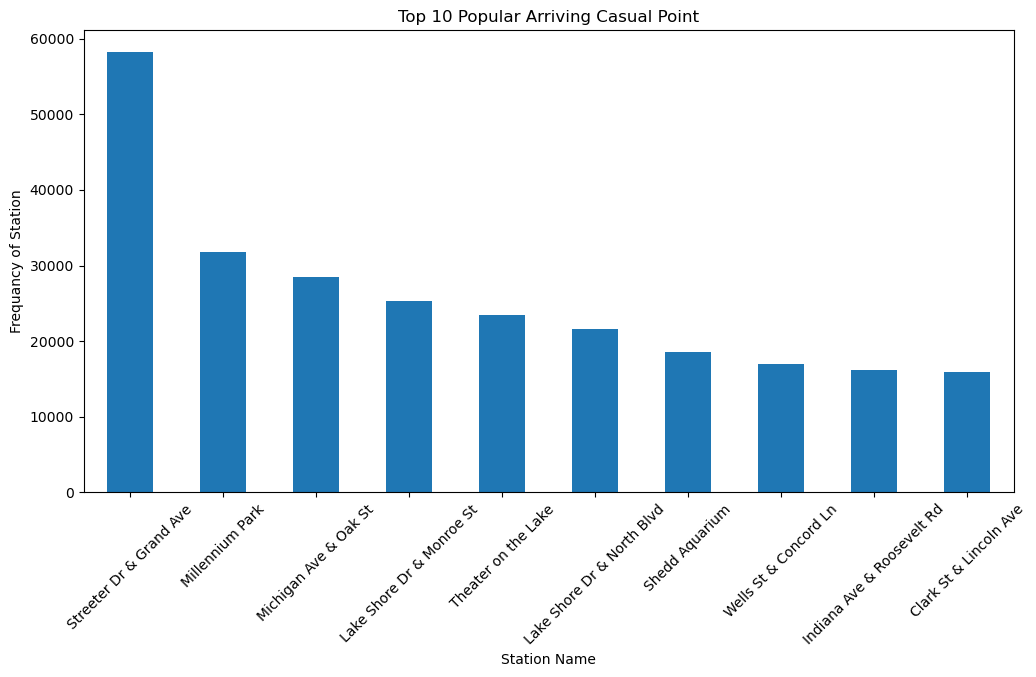

In [43]:
end_casual.plot(kind='bar', figsize=(12,6))

plt.title('Top 10 Popular Arriving Casual Point')
plt.xlabel('Station Name')
plt.ylabel('Frequancy of Station')
plt.xticks(rotation=45)

plt.show()

# The usage (number) in day name for ‘casual’ and ‘member’ riders?

In [44]:
df.groupby('day_of_week').agg({
    'ride_id' : 'count',
    'trip_duration' : 'mean'
}).sort_values(by='day_of_week')

,ride_id,trip_duration
day_of_week,,
0,605593,0 days 00:18:55.178544005
1,632838,0 days 00:17:25.501123510
2,638692,0 days 00:17:08.325984981
3,627630,0 days 00:16:57.972372257
4,702703,0 days 00:18:28.477464874
5,869057,0 days 00:23:00.491774417
6,745029,0 days 00:24:02.040806465


In [45]:
rides_in_weekdays = df.groupby('day_of_week').agg({
    'ride_id' : 'count'
}).sort_values(by='day_of_week')

rides_in_weekdays

,ride_id
day_of_week,
0,605593
1,632838
2,638692
3,627630
4,702703
5,869057
6,745029


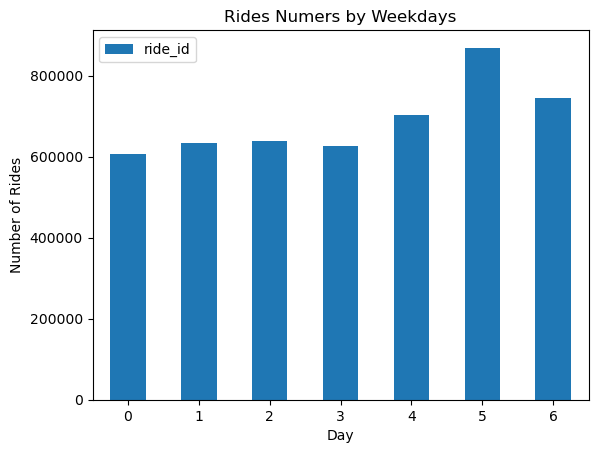

In [46]:
rides_in_weekdays.plot(kind='bar')

plt.title('Rides Numers by Weekdays')
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)

plt.show()

0 = Monday and so on.  
saturday has highest rides than sunday and friday, the rest of the weekdays are equal.